# Replication to Vaccines RCTs

Group 2

## Polio

In [1]:
using Pkg
#Pkg.build("PyCall")
#Pkg.add("KernelDensity")
#Pkg.add("PyCall")
#Pkg.add("Gadfly")

using Distributions

In [2]:
#np = pyimport("numpy")

LoadError: UndefVarError: pyimport not defined

In [3]:
NT = 200745 #number of treated

NC = 201229 #number of controlled

YT = 33/NT  #average outcome for treated

YC =115/NC  #average outcome for controlled

#incidence per 100000 

print("Incidence per 100000 among treated:", (YT*100000), "%.                                        ")

print( "Incidence per 100000 among controlled:", (YC*100000),"%.")

Incidence per 100000 among treated:16.438765598146905%.                                        Incidence per 100000 among controlled:57.14882049803955%.

In [4]:
# treatment effect estimate reduction in incidence  per 100000 people

delta_hat = 100000*(YT-YC)

print("Estimate TE of occurances per 100,000 ", (100000*(YT-YC)))

Estimate TE of occurances per 100,000 -40.71005489989265

In [5]:
Var_delta_hat =  (100000^2)*(YT*(1-YT)/NT +  YC*(1-YC)/NC)

# standard deviation

print("Standard deviation for ATE ",(Var_delta_hat^.5))

Standard deviation for ATE 6.047412320702958

In [6]:
# here we are using the fact that outcomes are Bernoulli 

CI_delta0 = delta_hat -1.96*Var_delta_hat^.5
CI_delta1 = delta_hat +1.96*Var_delta_hat^.5

print("95 % confidence interval is [" ,(CI_delta0), ", ",(CI_delta1), "]"   )

95 % confidence interval is [-52.56298304847044, -28.85712675131485]

In [7]:
# Here we calculate the overall effectiveness of the vaccine and construct confidence intervals for it

NV =  200745;
NU =  201229;
RV = 33/NV;
RU = 115/NU;
VE = (RU - RV)/RU;
print("Overall VE is ",(VE) )

Overall VE is 0.7123516206478694

In [8]:
# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

2.8383662703286493e-9

In [9]:
using Random


B = 10000

x = rand(Normal(),B)
y = rand(Normal(),B)

10000-element Vector{Float64}:
  0.8471945027489195
  0.5365920498391523
 -0.003711777714769806
 -0.14096598399145752
 -0.6775832620832836
  0.34615503856939295
 -1.6664333238421676
  0.6877169022770181
 -1.079100964734487
 -1.4901255765615573
  0.11919173596965965
 -0.348461799438592
 -0.6956770677489759
  ⋮
  0.31894612113913695
 -0.40189411228461364
  0.9379753071822932
  0.5272113053180368
  1.6540684306791893
  0.8572027806135033
  2.2505235421233394
  0.671875992076968
  1.5961069198414122
  1.4236550609670608
 -0.8442654416856017
 -0.18552202202331522

In [10]:
# set-up MC draws:
#Pkg.add("Statistics")
using Statistics

RVs = RV .+ x*((Var_RV)^0.5)
RUs = RU .+ y*((Var_RU)^0.5)
VEs= (RUs - RVs) ./ RUs


CI_VE_L = quantile!(VEs, 0.025)
CI_VE_U = quantile!(VEs, 0.975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.5922022520423746,0.8150882156225709]

In [11]:
#Pkg.add("Distributions")
#Pkg.add("StatsBase")
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("StatsPlots")

using Distributions  
using StatsBase
using CSV  
using DataFrames    
#a= filter(t ->  quantile!(VEs, 0.025) < t <  quantile!(VEs, 0.975), VEs)
#a
#summarystats(a)

b=copy(VEs);

In [12]:
summarystats(b)

Summary Stats:
Length:         10000
Missing Count:  0
Mean:           0.709936
Minimum:        0.406597
1st Quartile:   0.673507
Median:         0.712287
3rd Quartile:   0.749215
Maximum:        0.894264


In [13]:
using DataFrames    
df = DataFrame(col1 = b)
summarystats(b)

Summary Stats:
Length:         10000
Missing Count:  0
Mean:           0.709936
Minimum:        0.406597
1st Quartile:   0.673507
Median:         0.712287
3rd Quartile:   0.749215
Maximum:        0.894264


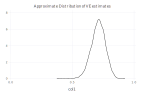

In [14]:
using Gadfly

Gadfly.plot(df, Coord.cartesian(xmin=0.0, xmax=1.0),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)
    #layer(x = "inuidur1", Geom.density , color=[colorant"black"]),

In [15]:
print("Incidence per 100000 among treated:", (YT*100000), "%.                                        ")
print("\nIncidence per 100000 among controlled:", (YC*100000),"%.")
print("\nEstimate TE of occurances per 100,000 ", (100000*(YT-YC)))
print("\nStandard deviation for ATE ",(Var_delta_hat^.5))
print("\n95 % confidence interval is [" ,(CI_delta0), ", ",(CI_delta1), "]"   )
print("\nOverall VE is ",(VE) )
print("\n95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

Incidence per 100000 among treated:16.438765598146905%.                                        
Incidence per 100000 among controlled:57.14882049803955%.
Estimate TE of occurances per 100,000 -40.71005489989265
Standard deviation for ATE 6.047412320702958
95 % confidence interval is [-52.56298304847044, -28.85712675131485]
Overall VE is 0.7123516206478694
95 % confidence interval is [0.5922022520423746,0.8150882156225709]

## Pfizer/BNTX Covid-19 RCT

In [16]:
NV =  19965; # number vaccinated
NU =  20172; # number unvaccinated
RV = 9/NV; # average outcome for vaccinated
RU = 169/NU; # average outcome for unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy

In [17]:
# incidence per 100000
Incidence_RV=RV*100000
Incidence_RU=RU*100000

print("Incidence per 100000 among vaccinated:", Incidence_RV, ".         ")

print("Incidence per 100000 among unvaccinated:", Incidence_RU)

Incidence per 100000 among vaccinated:45.07888805409467.         Incidence per 100000 among unvaccinated:837.7949633154868

In [18]:
# treatment effect - estimated reduction in incidence per 100000 people
delta_hat = 100000*(RV-RU)

print("Estimated ATE of occurances per 100,000 is",  delta_hat)

Estimated ATE of occurances per 100,000 is-792.7160752613921

In [19]:
# variance, standard deviation and confidence interval of ATE using that outcomes are Bernoulli

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU
Var_delta_hat =  100000^2*(Var_RV + Var_RU)
Std_delta_hat = sqrt(Var_delta_hat)

print("Standard deviation for ATE is ", Std_delta_hat)


Standard deviation for ATE is 65.91015718590171

In [20]:

CI_b_delta = delta_hat -1.96*sqrt(Var_delta_hat)
CI_u_delta = delta_hat +1.96*sqrt(Var_delta_hat)

print("95 % confidence interval of ATE is [", (CI_b_delta), ",", (CI_u_delta), "]" ,".         "  )

print("Overall VE is", VE)

95 % confidence interval of ATE is [-921.8999833457594,-663.5321671770248].         Overall VE is0.9461934124362605

In [21]:
# we use an approximate bootstrap to find the VE confidence interval
# using Monte Carlo draws as before

using Random

B = 10000

x = rand(Normal(),B)
y = rand(Normal(),B)


RVs = RV .+ x*((Var_RV)^0.5)
RUs = RU .+ y*((Var_RU)^0.5)
VEs= (RUs - RVs) ./ RUs


CI_VE_L = quantile!(VEs, 0.025)
CI_VE_U = quantile!(VEs, 0.975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.9090127759673896,0.981677274061279]

In [22]:
#plot
using Distributions  
using StatsBase
using CSV  
using DataFrames    
#a= filter(t ->  quantile!(VEs, 0.025) < t <  quantile!(VEs, 0.975), VEs)
#a
#summarystats(a)

b=copy(VEs)
summarystats(b)

Summary Stats:
Length:         10000
Missing Count:  0
Mean:           0.945788
Minimum:        0.861245
1st Quartile:   0.933349
Median:         0.946026
3rd Quartile:   0.958388
Maximum:        1.014359


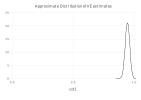

In [23]:
using DataFrames    
df = DataFrame(col1 = b)

using Gadfly

Gadfly.plot(df, Coord.cartesian(xmin=0, xmax=1),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)

In [24]:
print("Incidence per 100000 among vaccinated:", Incidence_RV, ".         ")
print("\nIncidence per 100000 among unvaccinated:", Incidence_RU)
print("\nEstimated ATE of occurances per 100,000 is",  delta_hat)
print("\nStandard deviation for ATE is ", Std_delta_hat)
print("\n95 % confidence interval of ATE is [", (CI_b_delta), ",", (CI_u_delta), "]" ,".         "  )
print("\nOverall VE is", VE)
print("\n95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

Incidence per 100000 among vaccinated:45.07888805409467.         
Incidence per 100000 among unvaccinated:837.7949633154868
Estimated ATE of occurances per 100,000 is-792.7160752613921
Standard deviation for ATE is 65.91015718590171
95 % confidence interval of ATE is [-921.8999833457594,-663.5321671770248].         
Overall VE is0.9461934124362605
95 % confidence interval is [0.9090127759673896,0.981677274061279]

####  groups that are 65 or older

In [25]:
# Here we calculate the overall effectiveness of the vaccine for the two groups that are 65 or older
NV =  3239+805;
NU =  3255+812;
RV = 1/NV;
RU = (14+5)/NU;
VE = (RU - RV)/RU;

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

print("Overall VE is ", VE)


Overall VE is 0.9470690822010516

In [26]:
# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:


Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU;

In [27]:
using Random

B = 10000

x = rand(Normal(),B)
y = rand(Normal(),B)


RVs = RV .+ x*((Var_RV)^0.5)
RUs = RU .+ y*((Var_RU)^0.5)
VEs= (RUs - RVs) ./ RUs


CI_VE_L = quantile!(VEs, 0.025)
CI_VE_U = quantile!(VEs, 0.975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.8119338410092212,1.0529360583985667]

In [28]:
#plot
using Distributions  
using StatsBase
using CSV  
using DataFrames    
#a= filter(t ->  quantile!(VEs, 0.025) < t <  quantile!(VEs, 0.975), VEs)
#a
#summarystats(a)

b=copy(VEs)
summarystats(b)

Summary Stats:
Length:         10000
Missing Count:  0
Mean:           0.942627
Minimum:        -6.176949
1st Quartile:   0.907593
Median:         0.946905
3rd Quartile:   0.983973
Maximum:        1.198106


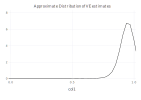

In [29]:
using DataFrames    
df = DataFrame(col1 = b)

using Gadfly

Gadfly.plot(df, Coord.cartesian(xmin=0, xmax=1),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)

In [30]:
NV_b =  3239+805;
NU_b =  3255+812;
RV_b = 1/NV_b;
RU_b = (14+5)/NU_b;
VE_b = (RU_b - RV_b)/RU_b;

print("Overall VE is ", VE_b)

Overall VE is 0.9470690822010516

In [31]:
using Random

B = 10000

RVs_b=rand(Binomial(NV_b, RV_b),B)  # Binomial distribution for n trials with success rate p
RUs_b = rand(Binomial(NU_b, RU_b),B)

VEs_b = (RUs_b-RVs_b)./ RUs_b

CI_VE_b = quantile!(VEs_b, 0.025)
CI_VE_c = quantile!(VEs_b, 0.975)


print("Two-sided 95 % confidence interval is [", (CI_VE_b), ",", (CI_VE_c), "]"   )

Two-sided 95 % confidence interval is [0.8,1.0]

In [32]:
CI_VE_b_1 = quantile!(VEs_b, 0.05)


print("one-sided 95 % confidence interval is [", (CI_VE_b_1), ",",  " 1]"   )

one-sided 95 % confidence interval is [0.8333333333333334, 1]

In [37]:
#plot
using Distributions  
using StatsBase
using CSV  
using DataFrames    
#binomial_int= filter(t ->  quantile!(VEs_b, 0.025) < t <  quantile!(VEs_b, 0.975), VEs_b)
#binomial_int
#summarystats(binomial_int)

binom=copy(VEs_b)
summarystats(binom)

Summary Stats:
Length:         10000
Missing Count:  0
Mean:           0.944167
Minimum:        0.500000
1st Quartile:   0.913043
Median:         0.950000
3rd Quartile:   1.000000
Maximum:        1.000000


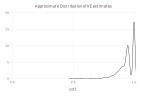

In [38]:
using DataFrames    
df_pfizer_bin = DataFrame(col1 = binom)

using Gadfly

Gadfly.plot(df_pfizer_bin, Coord.cartesian(xmin=0, xmax=1),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)